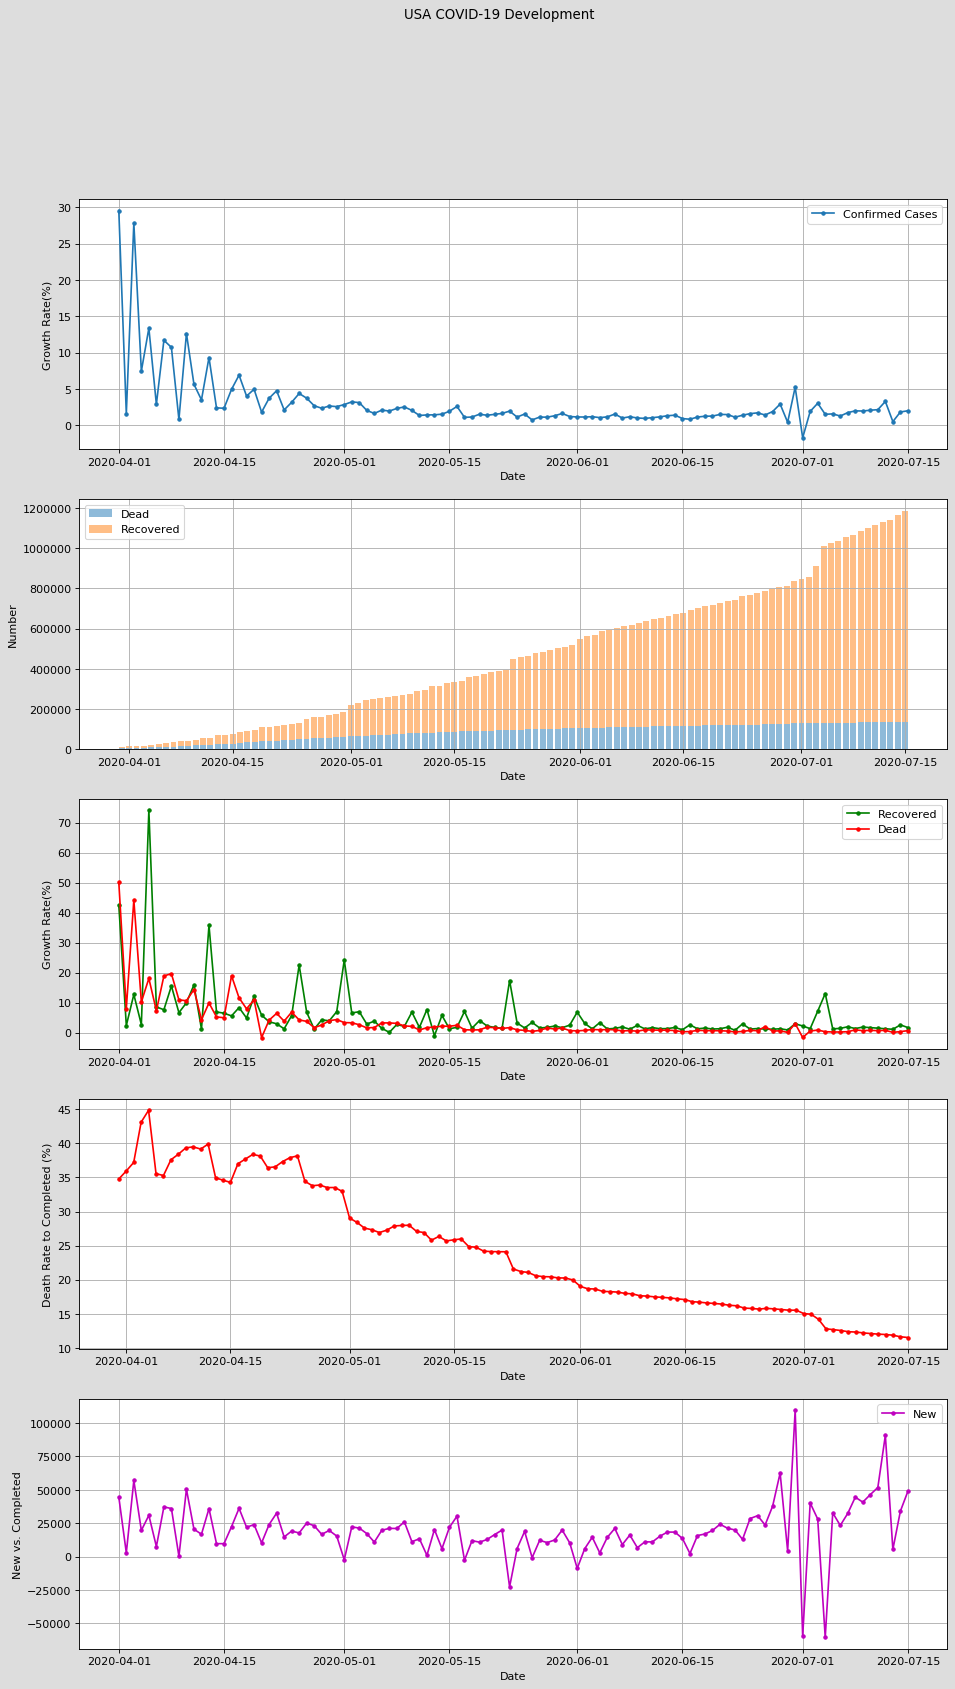

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def growth(ser):
    new = pd.Series(ser.iloc[1:].array)
    old = pd.Series(ser.iloc[:-1].array)
    delta = new - old
    return delta

def growth_pcnt(ser):
    new = pd.Series(ser.iloc[1:].array)
    old = pd.Series(ser.iloc[:-1].array)
    delta = new - old
    return delta / old * 100
 
cvusa_data = pd.read_csv('cv-dev-usa.csv')

plt.figure(num=None, figsize=(14,24), dpi=80, facecolor='#dddddd', edgecolor='k')

dates = pd.to_datetime(cvusa_data.Date)

dead = cvusa_data.Dead
recovered = cvusa_data.Recovered
confirmed = cvusa_data.Confirmed
total = cvusa_data.Dead + cvusa_data.Recovered
#
dates_dlt = pd.Series(dates[1:].array)

plt.subplot(5, 1, 1)
plt.plot(dates_dlt, growth_pcnt(confirmed), ".-")
plt.xlabel("Date")
plt.ylabel("Growth Rate(%)")
plt.legend(["Confirmed Cases"])
plt.grid()

plt.subplot(5, 1, 2)
plt.bar(dates, dead, align='center', alpha=0.5)
plt.bar(dates, recovered, bottom=dead, align='center', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Number")
plt.legend([ "Dead", "Recovered"])
plt.grid()
#
plt.subplot(5, 1, 3)
plt.plot(dates_dlt, growth_pcnt(recovered), ".-g")
plt.plot(dates_dlt, growth_pcnt(dead), ".-r")
plt.xlabel("Date")
plt.ylabel("Growth Rate(%)")
plt.legend(["Recovered", "Dead"])
plt.grid()
#
plt.subplot(5, 1, 4)
death_pcnt = dead / total * 100.0
plt.plot(dates, death_pcnt, ".-r")
plt.xlabel("Date")
plt.ylabel("Death Rate to Completed (%)")
plt.grid()
#
plt.subplot(5, 1, 5)
confirmed_new = growth(confirmed)
completed_new = growth(dead) + growth(recovered)
real_growth = confirmed_new - completed_new
plt.plot(dates_dlt, real_growth, ".-m")
plt.xlabel("Date")
plt.ylabel("New vs. Completed")
plt.legend(["New", "Completed"])
plt.grid()
#
plt.suptitle("USA COVID-19 Development")
plt.show()
# print(death_pcnt)


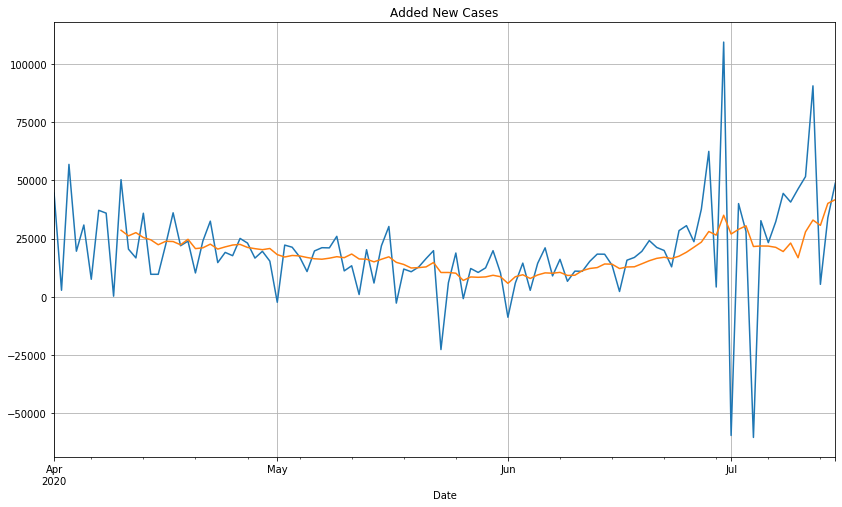

In [17]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


def growth(ser):
    # returning array
    new = pd.Series(ser.iloc[1:].array)
    old = pd.Series(ser.iloc[:-1].array)
    delta = new - old
    return delta.iloc[:].array



cvusa = pd.read_csv('cv-dev-usa.csv', parse_dates=True, index_col=0)

confirmed = cvusa.Confirmed
confirmed_new = pd.Series(growth(cvusa.Confirmed), index=confirmed.index[1:])
dead_new = pd.Series(growth(cvusa.Dead), index=confirmed.index[1:])
recovered_new = pd.Series(growth(cvusa.Recovered), index=confirmed.index[1:])

growth = confirmed_new - (dead_new + recovered_new)

growth.plot(figsize=(14, 8), title="Added New Cases") 
growth.rolling(10).mean().plot(grid=True)



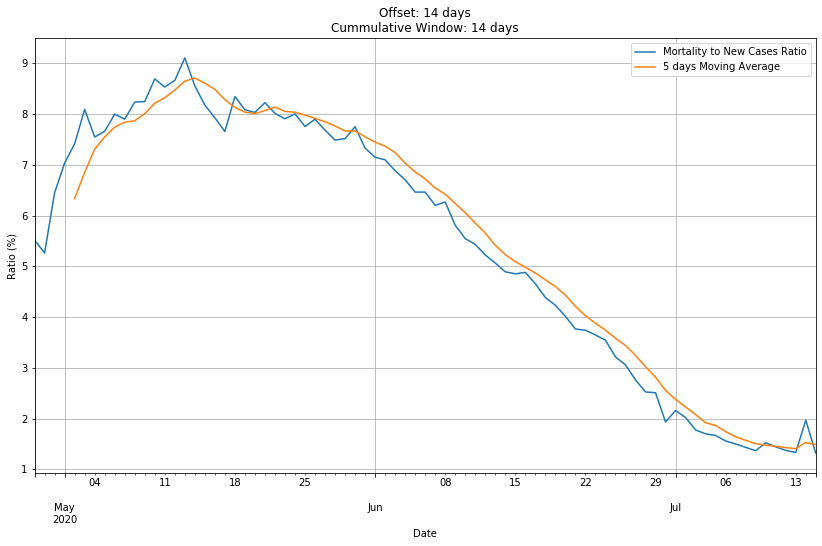

In [18]:
# New Cases -> Deathes Correlation
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def mortalityToNewCasesRatio(confirmed, dead, cumDaysWindow, offsetDays):
    # accumulate total confirmed during that "cummDaysWindow" days
    cummConf = confirmed - confirmed.shift(cummDaysWindow)

    # death accumulate for same windows but "offsetDays" later
    deadOffset = dead.shift(offsetDays)
    cummDead = deadOffset -  deadOffset.shift(cummDaysWindow)

    return cummDead * 100 / cummConf
    


cvusa = pd.read_csv('cv-dev-usa.csv', parse_dates=True, index_col=0)

cummDaysWindow = 14
offsetDays = 14
maDays = 5

ratio = mortalityToNewCasesRatio(cvusa["Confirmed"], cvusa["Dead"], cummDaysWindow, offsetDays).dropna()


ratio.plot(title="Offset: {} days\nCummulative Window: {} days".format(
                offsetDays, cummDaysWindow)
           , figsize=(14, 8)
           , grid=True
           , legend=True
           , label="Mortality to New Cases Ratio"
           )

ratio.rolling(maDays).mean().plot(grid=True
                                  , label="{} days Moving Average".format(maDays)
                                  , legend=True)
plt.ylabel("Ratio (%)")
plt.show()